# Classification Using Amazon Dataset

## Dataset & Tools

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls 

A-B Testing & T-tests.ipynb
Attempt 2_A-B.ipynb
Capstone 2_A-B Testing of Syria and Yemen Cases.ipynb
Capstone_Qayyum_Gender Inequality Index-Copy1.ipynb
Capstone_Qayyum_Gender Inequality Index_Homework.ipynb
Checkpoint 5_Summary Statistics.ipynb
Exercise_Matplotlib.ipynb
Exercise_Module 8_Matplotlib.ipynb
Exercise_Module 9_Matplotlib and CLT.ipynb
Experimental Design.ipynb
Gender Inequality Index_Capstone 1-Revise February-Copy1.ipynb
Gender Inequality Index_Capstone 1-Revise February.ipynb
Gender Inequality Index_Capstone 1-Revise Qayyum.ipynb
Gender Inequality Index_Capstone 1.ipynb
Gender_Scatter Plot-Copy1.ipynb
Gender_Scatter Plot-Copy2.ipynb
Gender_T-test.ipynb
Missing Data and Cleaning Project.ipynb
Module 13_Data Cleaning-Validation Project.ipynb
Module 13_Data Visualization_Seaborns
Module 16.9 -16.10 Challenge_Life Expectancy.ipynb
Module 17_Classification Problems.ipynb
Module Preparation_Data Cleaning.ipynb
Qayyum_Capstone1_Submission.ipynb
SEND_THIS_TO_TIAGO.json.xz
SQL F

In [ ]:
pd.read_csv?

#Loading Dataset below

In [3]:
pd.read_csv("amazon_cells_labelled.txt", sep="\t", header=None, names=["review_text", "value"])
#from 17.5: data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
            # "master/sms_spam_collection/SMSSpamCollection")
    
#sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
#Add in headers 'review_text' and 'value'

,review_text,value
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


## Naming Data Set

In [4]:
amazon_df= pd.read_csv("amazon_cells_labelled.txt", sep="\t", header=None, names=["review_text", "value"])

In [5]:
print(amazon_df)

                                           review_text  value
0    So there is no way for me to plug it in here i...      0
1                          Good case, Excellent value.      1
2                               Great for the jawbone.      1
3    Tied to charger for conversations lasting more...      0
4                                    The mic is great.      1
..                                                 ...    ...
995  The screen does get smudged easily because it ...      0
996  What a piece of junk.. I lose more calls on th...      0
997                       Item Does Not Match Picture.      0
998  The only thing that disappoint me is the infra...      0
999  You can not answer calls with the unit, never ...      0

[1000 rows x 2 columns]


#### Attempt 2: Note for file-input.py CANNOT be used for links
f = open('/Users/mehrunisaqayyum/⁨Thinkful Data Science Projects⁩/amazon_cells_labelled.txt','r')
message = f.read()
print(message)
f.close()

##### Attempt 3
import os
THIS_FOLDER = os.path.dirname(os.path.abspath('/Users/mehrunisaqayyum/⁨Thinkful Data Science Projects⁩/amazon_cells_labelled.txt'))
my_file = os.path.join(THIS_FOLDER, '/Users/mehrunisaqayyum/⁨Thinkful Data Science Projects⁩/amazon_cells_labelled.txt')

In [ ]:
## Looking at Data

In [6]:
sum(amazon_df['review_text'].isnull())

0

In [7]:
sum(amazon_df['value'].isnull())

0

In [8]:
amazon_df.columns = ["review_text", "value"] #Borrowed from Module 17.5: 
                                            #sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
                                            #sms_raw.columns = ['spam', 'message']

In [9]:
amazon_df['review_text'].value_counts()

Great phone!.                                                                                 2
Great phone.                                                                                  2
This is a great deal.                                                                         2
Does not fit.                                                                                 2
If you like a loud buzzing to override all your conversations, then this phone is for you!    2
                                                                                             ..
That company is a joke.                                                                       1
I was very excited to get this headset because I thought it was really cute.                  1
If you plan to use this in a car forget about it.                                             1
What a waste of time!                                                                         1
I love being able to use one headset for

## Identify Keywords

In [10]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent'] 
                                                                    #~add in 'trial' and 'XXX' for additional features

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_df[str(key)] = amazon_df['review_text'].str.contains(
        '\W' + str(key) + '\W',
        case=False
    )
    
    # ' OffEr '
    #. 'offer.'

In [11]:
amazon_df['allcaps'] = amazon_df["review_text"].str.isupper()

### Insert 'Spam'

In [ ]:
temp = 1 == 0

In [12]:
amazon_df['review_text'] == 'spam'

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: review_text, Length: 1000, dtype: bool

In [13]:
amazon_df['a_ton_of_false_values'] = (amazon_df['review_text'] == 'spam')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

### Plot Heatmap

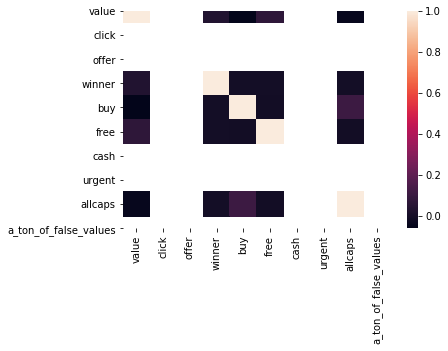

In [14]:
sns.heatmap(amazon_df.corr())

In [ ]:
amazon_df.corr()

In [15]:
amazon_df['offer'].value_counts()

False    1000
Name: offer, dtype: int64

In [16]:
data = amazon_df[keywords + ['allcaps']]
target = amazon_df['review_text']

In [17]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 996


## Add Own Features

In [18]:
#~added in 'trial' and 'XXX' and a period
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent','trial', 'XXX'] 
                                                                    #~add in 'trial' and 'XXX' for additional features

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_df[str(key)] = amazon_df['review_text'].str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [19]:
amazon_df.corr()

,value,click,offer,winner,buy,free,cash,urgent,allcaps,a_ton_of_false_values,trial,XXX
value,1.000000,NaN,NaN,0.031639,-0.085113,0.063372,NaN,NaN,-0.041135,NaN,NaN,NaN
click,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
offer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
winner,0.031639,NaN,NaN,1.000000,-0.003770,-0.002005,NaN,NaN,-0.003904,NaN,NaN,NaN
buy,-0.085113,NaN,NaN,-0.003770,1.000000,-0.007551,NaN,NaN,0.055317,NaN,NaN,NaN
free,0.063372,NaN,NaN,-0.002005,-0.007551,1.000000,NaN,NaN,-0.007820,NaN,NaN,NaN
cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
urgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
allcaps,-0.041135,NaN,NaN,-0.003904,0.055317,-0.007820,NaN,NaN,1.000000,NaN,NaN,NaN
a_ton_of_false_values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
r"\W" + str(keywords[0]) + r"\W"

## Test on Second Data Set
 Test it on one of the other datasets. Will use IMDB: imdb_labelled.txt 

In [20]:
pd.read_csv?

In [21]:
pd.read_csv("imdb_labelled.txt", sep="\t", header=None, names=["review_text2", "value"])

,review_text2,value
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [22]:
imdb_df = pd.read_csv("imdb_labelled.txt", sep="\t", header=None, names=["review_text2", "value"])

In [23]:
print(imdb_df)

                                          review_text2  value
0    A very, very, very slow-moving, aimless movie ...      0
1    Not sure who was more lost - the flat characte...      0
2    Attempting artiness with black & white and cle...      0
3         Very little music or anything to speak of.        0
4    The best scene in the movie was when Gerardo i...      1
..                                                 ...    ...
743  I just got bored watching Jessice Lange take h...      0
744  Unfortunately, any virtue in this film's produ...      0
745                   In a word, it is embarrassing.        0
746                               Exceptionally bad!        0
747  All in all its an insult to one's intelligence...      0

[748 rows x 2 columns]


In [24]:
imdb_df.columns
#we have some nan values, so remove them.

Index(['review_text2', 'value'], dtype='object')

In [25]:
print(imdb_df.shape)

(748, 2)


### Missing Values

In [26]:
# drop rows with missing values
print(imdb_df.dropna(inplace=True))
# summarize the number of rows and columns in the dataset

None


In [34]:
#Drop 'Nan' values
imdb_df["review_text2"].dropna()
#print(imdb_df["review_text2"].dropna()

0      A very, very, very slow-moving, aimless movie ...
1      Not sure who was more lost - the flat characte...
2      Attempting artiness with black & white and cle...
3           Very little music or anything to speak of.  
4      The best scene in the movie was when Gerardo i...
                             ...                        
743    I just got bored watching Jessice Lange take h...
744    Unfortunately, any virtue in this film's produ...
745                     In a word, it is embarrassing.  
746                                 Exceptionally bad!  
747    All in all its an insult to one's intelligence...
Name: review_text2, Length: 748, dtype: object

In [35]:
imdb_df['review_text2'] = (imdb_df['review_text2'] == 'spam')

In [36]:
imdb_df['review_text2'].value_counts()

False    748
Name: review_text2, dtype: int64

In [37]:
#~added in 'trial' and 'XXX' and a period
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent','trial', 'XXX'] 
                                                                    #~add in 'trial' and 'XXX' for additional features

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    imdb_df[str(key)] = imdb_df['review_text2'].str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

AttributeError: Can only use .str accessor with string values!

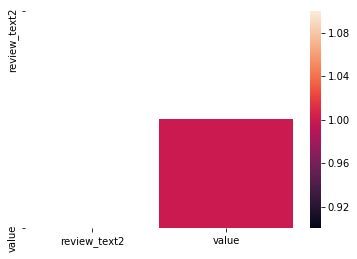

In [38]:
sns.heatmap(imdb_df.corr())

In [39]:
data = imdb_df[keywords + ['allcaps']]
target = imdb_df['spam']

KeyError: "None of [Index(['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent', 'trial',\n       'XXX', 'allcaps'],\n      dtype='object')] are in the [columns]"

In [ ]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

## Bayesian Poisoning

When implementing Naive Bayes, there is one more thing you must be aware of. Because Naive Bayes relies on probabilities and these probabilities are often based around obvious keywords it is a vulnerable model. By that we mean that people can manipulate the model. This is done through a process called Bayesian Poisoning.

In spam, this would be done through including words in your spam message that would be highly unlikely to be part of a spam message. This would convince the model that the message is legitimate and let it into your inbox or wherever.

Can you think of how you could do that here? Look at some spam messages that your model correctly identified and see if you can reword or rework them to get them classified as ham.

## Accuracy and Error types

Check for Accuracy and Error types by building a confusion matrix.

In [ ]:
# Calculate the accuracy of your Amazon model here.
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

# Summary:

### Provide brief writeup of your feature engineering and selection process to submit and review with your mentor.
1) Do any of your classifiers seem to overfit?
2)Which seem to perform the best? Why?
3) Which features seemed to be most impactful to performance?

## Holdout Groups

In [ ]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

## Cross Validation 

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

# Bubbly Plot Visual 

Source Article: https://towardsdatascience.com/visualising-economic-data-using-plotly-a07f96f58160

Note: 
Uses World Bank data set to group countries into continents (or regions)
The other thing we need to do now is to create a continent column which maps the country to the correct continent as this information will be used when plotting. To do this we create a dictionary using the gapminder dataset and then map this dictionary to a new column in my merged dataset.

dictionary = dict(zip(gapminder_indicators[‘country’], gapminder_indicators[‘continent’]))
data[“continent”] = data[“Country Name”].map(dictionary)
data.rename(columns = {‘Data_x’: ‘GDP_pc’, ‘Data_y’: ‘Life Expectancy’, ‘Data’: ‘Population’}, inplace=True)
***************************************
Finally, we have a finished dataset and we can create our plot. We use the bubbleplot function in the bubbly library to do this. The function creates a beautiful interactive plot of life expectancy vs GDP per capita and plots the size of the bubble according to the population of the country. The bubbles are also coloured by the continent and we are able to plot all of this information across time which is really nice. The most notable changes are China and India indicated by the largest purple bubbles. At the start of the sample, they were among the poorest countries and had a relatively low life expectancy.
Over time, however, the made a substantial move towards the upper right of the chart indicating large increases in both GDP per capita and life expectancy. This pretty much mirrors what we have seen with China becoming an economic powerhouse over the last 20 years or so.
What is also clear from the chart is that there is a positive correlation between GDP per capita and Life Expectancy. As one increases the other also tends to increase. Of course, this tells us nothing about any causal relationship and it is unclear whether countries have a higher life expectancy because they are rich or countries are rich because they have a higher life expectancy. That is perhaps a question for an economics research paper and not this particular blog post.
So that is how you can extract data from the internet using beautiful soup and also how to use data visualisations to interpret and uncover trends in data which might not be immediately obvious looking at the raw data.

*************************************
from bubbly.bubbly import bubbleplot

figure = bubbleplot(dataset=data, x_column=’GDP_pc’, y_column=’Life Expectancy’, 
 bubble_column=’Country Name’, time_column=’Year’, size_column=’Population’, color_column=’continent’, 
 x_title=”GDP per Capita”, y_title=”Life Expectancy”, title=’Gapminder Global Indicators’,
 x_logscale=True, scale_bubble=3, height=650)
iplot(figure, config={‘scrollzoom’: True})